In [89]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

def get_seperators_from_line(imgarray):
    """ Takes image array of a line and outputs the seperating spaces for words"""
    shape_x, shape_y = imgarray.shape
    total_seperator = 0
    result = []
    for i in range(shape_y):
        curr_col = imgarray[:, i]
        if np.average(curr_col) > 250.0:
            result.append(i)
    return result

def get_seperators_from_pagragraph(imgarray):
    """ Takes image array of a paragraph and outputs the seperating spaces for lines """
    shape_x, shape_y = imgarray.shape
    total_seperator = 0
    result = []
    for i in range(shape_x):
        curr_row = imgarray[i, :]
        if np.average(curr_row) > 250.0:
            result.append(i)
    return result

def group_consecutives(vals, step=1):
    """Finds gaps between words or letters in an array"""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

def breakup_consecutive_line(result):
    """ Takes gaps of words and letters and classifies it into word or letter gap """
    word_indices = []
    letter_indices = []
    for group in result:
        if len(group) <= 2:
            letter_indices.append(group[0])
        else:
            word_indices.append(group[int(len(group)/2)])
    return (word_indices, letter_indices)
            
    
def breakup_consecutive_paragraph(result):
    """ Takes gaps from paragraph image and outputs the lines """
    line_indices = []
    for group in result:
        if len(group) >= 5:
            line_indices.append(group[4])
    return line_indices[1:]


def allocate_letters(word_indices, letter_indices):
    """ Takes letter indices and allocates them into words."""
    """ Returns a map that maps words to its letters. """
    letter_pointer = 0
    end = len(letter_indices)
    word_map = {}
    for i in range(len(word_indices)-1):
        left_word_index = word_indices[i]
        right_word_index = word_indices[i+1]
        curr_letters = [left_word_index]
        while left_word_index < letter_indices[letter_pointer] < right_word_index:
            curr_letters.append(letter_indices[letter_pointer])
            letter_pointer += 1
            if letter_pointer > end-1:
                curr_letters.append(right_word_index)
                word_map[(left_word_index, right_word_index)] = curr_letters
                return word_map
        curr_letters.append(right_word_index)
        word_map[(left_word_index, right_word_index)] = curr_letters
    return word_map

def line_pipeline(lineimg):
    """ Takes image of a line and outputs the line's word map """ 
    groups = group_consecutives(get_seperators_from_line(lineimg))
    word_indices, letter_indices = breakup_consecutive_line(groups)
    wordmap = allocate_letters(word_indices, letter_indices)
    return wordmap

def image_pipeline(imgarray):
    """ Pipeline for an image. Out puts a graph structure for lines, words, characters"""
    result = get_seperators_from_pagragraph(imgarray)
    result = breakup_consecutive_paragraph(group_consecutives(result))
    result = [0] + result
    output = {}
    for i in range(len(result)-1):
        currline = imgarray[result[i]:result[i+1], :]
        currmap = line_pipeline(currline)
        output[(result[i],result[i+1])] = currmap
    return output

In [26]:
lineimg = ndimage.imread('sentence.png', flatten = True)
paragraphimg = ndimage.imread('paragraph.png', flatten = True)

In [8]:
groups = group_consecutives(get_seperators_from_line(testimg))
word_indices, letter_indices = breakup_consecutive_line(groups)
wordmap = allocate_letters(word_indices, letter_indices)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


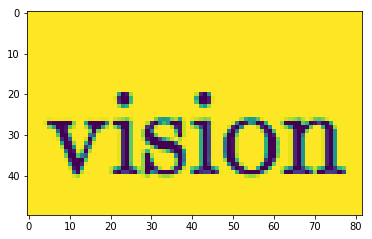

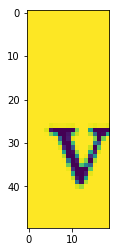

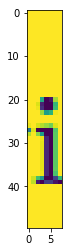

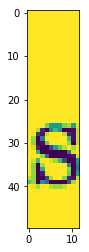

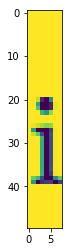

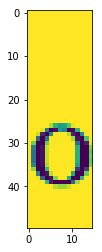

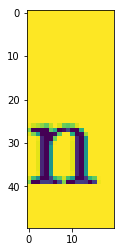

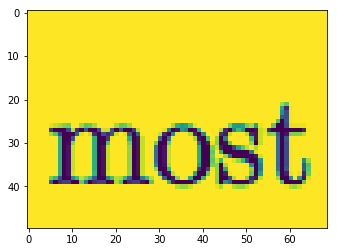

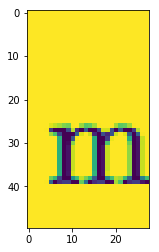

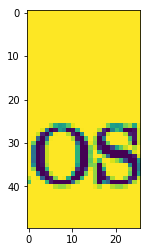

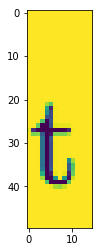

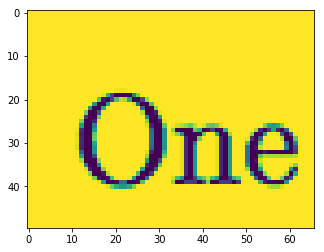

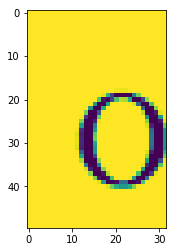

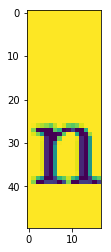

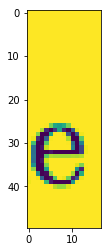

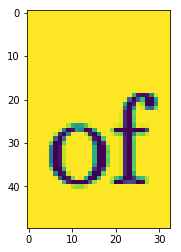

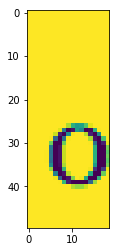

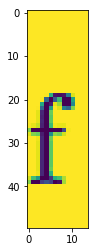

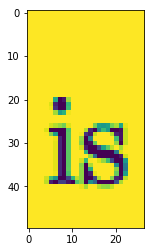

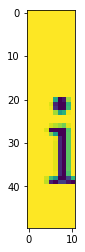

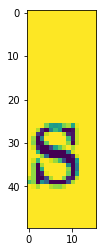

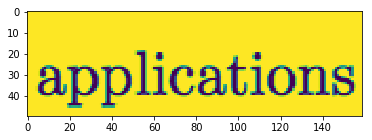

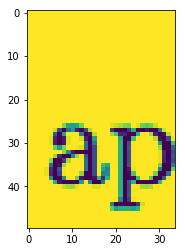

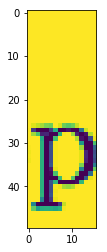

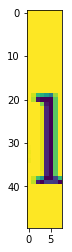

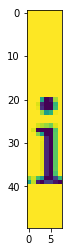

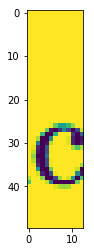

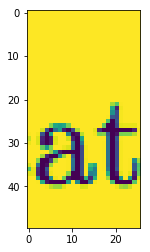

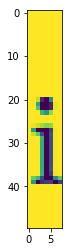

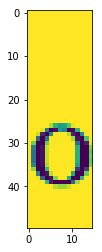

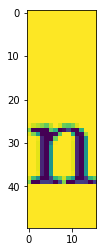

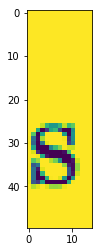

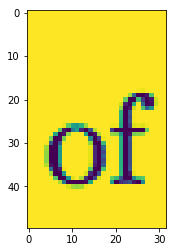

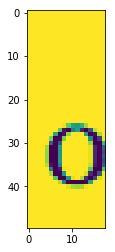

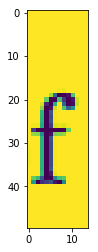

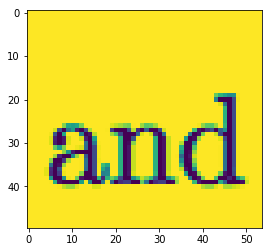

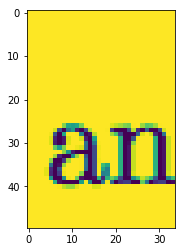

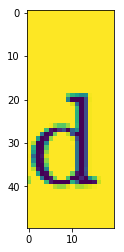

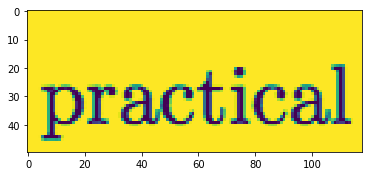

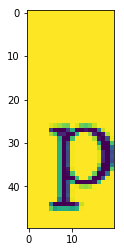

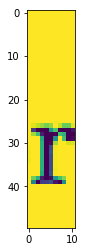

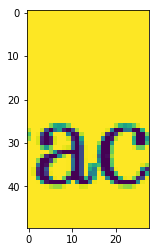

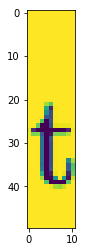

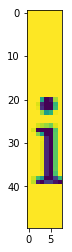

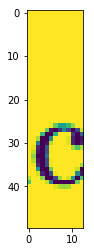

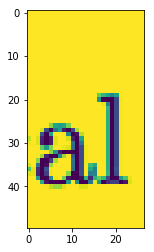

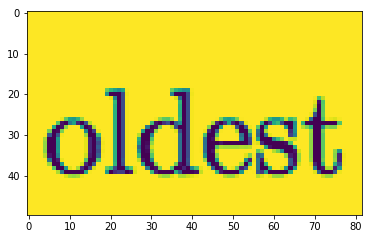

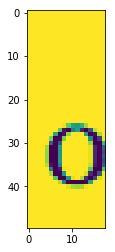

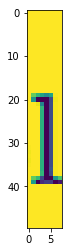

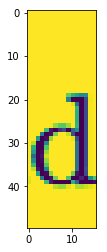

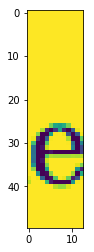

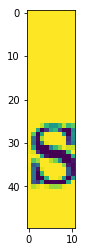

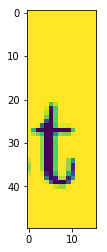

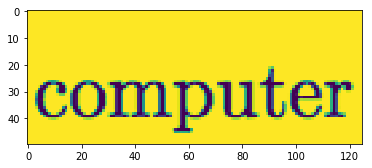

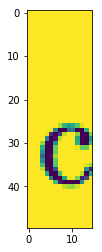

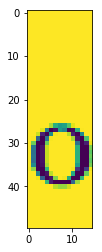

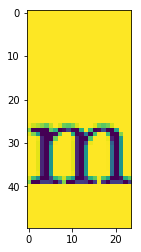

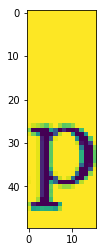

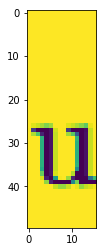

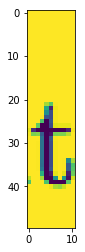

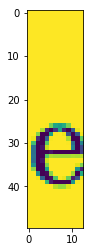

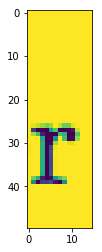

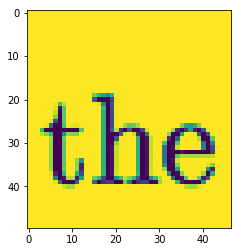

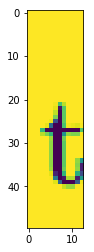

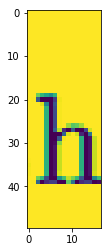

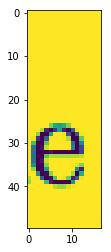

In [9]:
figure = 0
for keys in wordmap:
    plt.figure(figure)
    plt.imshow(testimg[:,keys[0]:keys[1]])
    figure += 1
    curr_characters = wordmap[keys]
    for i in range(len(curr_characters)-1):
        plt.figure(figure)
        plt.imshow(testimg[:,curr_characters[i]:curr_characters[i+1]])
        figure += 1
plt.show()

    

Pipeline: 

1) Make graph structure
2) Use OCR for all leaves
3) Use graph to turn into words and then to sentences
4) Run spell check on words
5) Output 

In [28]:
paragraphimg.shape

(170, 1438)

In [53]:
breakup_consecutive_paragraph(group_consecutives(result))

[61, 97, 129, 165]

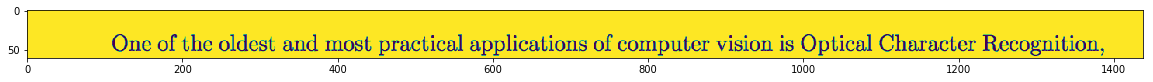

In [73]:
plt.figure(figsize=(20,10))
plt.imshow(paragraphimg[0:61,:])
plt.show()

In [78]:
newline = paragraphimg[0:61,:]
line_pipeline(newline)

{(55, 164): [55, 130, 146, 164],
 (164, 196): [164, 182, 196],
 (196, 243): [196, 209, 226, 243],
 (243, 325): [243, 261, 269, 285, 298, 309, 325],
 (325, 379): [325, 359, 379],
 (379, 448): [379, 407, 421, 433, 448],
 (448, 518): [448, 468, 479, 507, 518],
 (518, 566): [518, 526, 539, 566],
 (566, 725): [566, 600, 616, 624, 632, 645, 661, 670, 678, 693, 709, 725],
 (725, 758): [725, 743, 758],
 (758, 828): [758, 773, 787, 811, 828],
 (828, 884): [828, 835, 844, 854, 868, 884],
 (884, 965): [884, 902, 910, 922, 929, 944, 965],
 (965, 992): [965, 976, 992],
 (992, 1093): [992, 1017, 1034, 1045, 1053, 1066, 1093],
 (1093, 1134): [1093, 1117, 1134],
 (1134, 1198): [1134, 1149, 1160, 1175, 1187, 1198],
 (1198, 1227): [1198, 1211, 1227],
 (1227, 1331): [1227, 1249, 1252, 1265, 1277, 1292, 1307, 1322, 1331],
 (1331, 1382): [1331, 1341, 1349, 1364, 1382]}

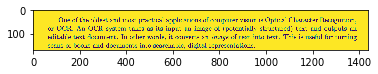

In [83]:
plt.imshow(paragraphimg)
plt.show()

In [90]:
image_pipeline(paragraphimg)

{(0, 61): {(55, 164): [55, 130, 146, 164],
  (164, 196): [164, 182, 196],
  (196, 243): [196, 209, 226, 243],
  (243, 325): [243, 261, 269, 285, 298, 309, 325],
  (325, 379): [325, 359, 379],
  (379, 448): [379, 407, 421, 433, 448],
  (448, 518): [448, 468, 479, 507, 518],
  (518, 566): [518, 526, 539, 566],
  (566, 725): [566, 600, 616, 624, 632, 645, 661, 670, 678, 693, 709, 725],
  (725, 758): [725, 743, 758],
  (758, 828): [758, 773, 787, 811, 828],
  (828, 884): [828, 835, 844, 854, 868, 884],
  (884, 965): [884, 902, 910, 922, 929, 944, 965],
  (965, 992): [965, 976, 992],
  (992, 1093): [992, 1017, 1034, 1045, 1053, 1066, 1093],
  (1093, 1134): [1093, 1117, 1134],
  (1134, 1198): [1134, 1149, 1160, 1175, 1187, 1198],
  (1198, 1227): [1198, 1211, 1227],
  (1227, 1331): [1227, 1249, 1252, 1265, 1277, 1292, 1307, 1322, 1331],
  (1331, 1382): [1331, 1341, 1349, 1364, 1382]},
 (61, 97): {(32, 96): [32, 78, 96],
  (96, 179): [96, 123, 144, 167, 179],
  (179, 231): [179, 207, 231],
  (

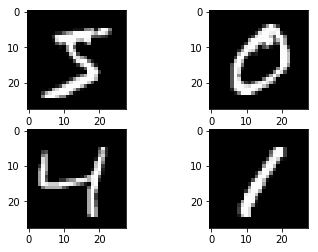

In [120]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [94]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 191s - loss: 0.3963 - acc: 0.8783 - val_loss: 0.0974 - val_acc: 0.9690
Epoch 2/10
60000/60000 [==============================] - 197s - loss: 0.0942 - acc: 0.9709 - val_loss: 0.0577 - val_acc: 0.9816
Epoch 3/10
60000/60000 [==============================] - 201s - loss: 0.0683 - acc: 0.9790 - val_loss: 0.0385 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 182s - loss: 0.0563 - acc: 0.9826 - val_loss: 0.0334 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 178s - loss: 0.0470 - acc: 0.9856 - val_loss: 0.0293 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 175s - loss: 0.0437 - acc: 0.9861 - val_loss: 0.0299 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 188s - loss: 0.0375 - acc: 0.9879 - val_loss: 0.0277 - val_acc: 0.9911
Epoch 8/10
60000/60000 [=======================

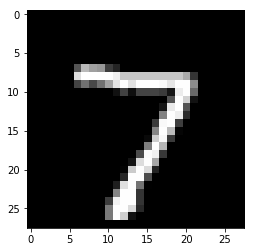

In [101]:
plt.imshow(X_test[0,0,:,:], cmap=plt.get_cmap('gray'))
plt.show()

In [116]:
model.predict(X_test[0:1,:,:,:])

array([[  1.89953675e-09,   8.77053008e-09,   2.65384216e-07,
          9.55970154e-06,   5.77249359e-09,   1.80880193e-07,
          1.25918035e-11,   9.99988317e-01,   1.41743897e-08,
          1.63775553e-06]], dtype=float32)

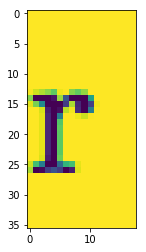

In [118]:
## 61, 97): {(32, 96
plt.imshow(paragraphimg[61:97, 78:96])
plt.show()